# Plotly Plot

In [12]:
import dash
from dash import html, dcc

# This is only needed to that we can run dash in a notebook
from jupyter_dash import JupyterDash
import plotly
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(color_codes=True)

In [2]:
import plotly.express as px

# Load Data

In [3]:
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Plotly.express

### Bar plot

In [4]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

### Scatter Plot

In [5]:
px.scatter(x=flights.index, y=flights.passengers)

In [6]:
px.scatter(iris, x="sepal_width", y="sepal_length")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

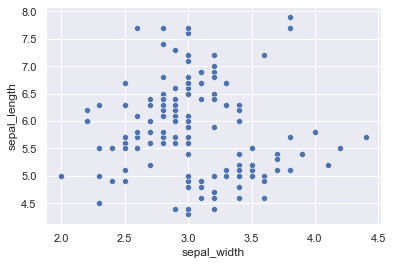

In [7]:
sns.scatterplot(data=iris, x="sepal_width", y="sepal_length")

#### Color parameter

In [10]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

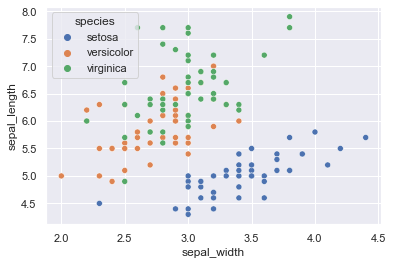

In [13]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=iris, hue="species")

#### size parameter and hover data
Totally 4 dimensions with more hover data

In [16]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", 
           size="petal_length", hover_data=['petal_width'])

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

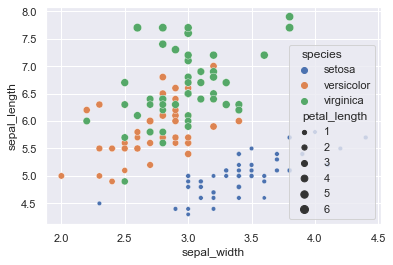

In [17]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=iris, hue="species", size="petal_length")

#### Color category vs Color continuous

In [18]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="petal_length")

#### Symbol

In [46]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="petal_length", symbol="species")

#### Facetting

In [47]:
tips = sns.load_dataset("tips")
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
px.scatter(tips, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")

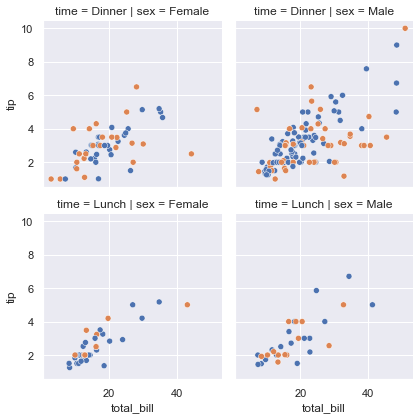

In [50]:
g = sns.FacetGrid(data=tips, row="time", col="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="smoker")

#### Linear Regression line

In [51]:
px.scatter(tips, x="total_bill", y="tip", trendline="ols")

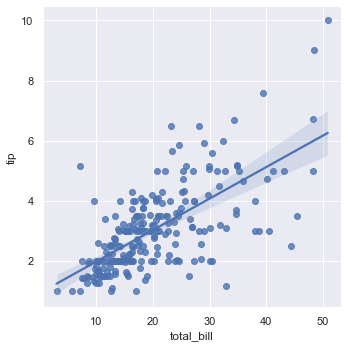

In [52]:
sns.lmplot(data=tips, x="total_bill", y="tip")

## Line Plot: px.line

In [38]:
t = np.linspace(0, 2*np.pi, 100)
px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})

Text(0, 0.5, 'cos(t)')

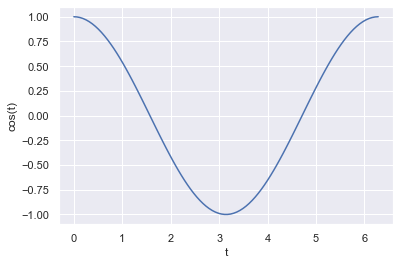

In [41]:
sns.lineplot(x=t, y=np.cos(t))
plt.xlabel("t")
plt.ylabel("cos(t)")

### markers = True

In [45]:
df = px.data.gapminder().query("continent == 'Oceania'")
px.line(df, x='year', y='lifeExp', color='country', markers=True)

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

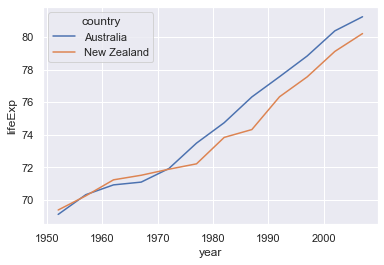

In [57]:
sns.lineplot(data=df, x="year", y="lifeExp", hue="country")

# plotly.graph: go

In [58]:
import plotly.graph_objects as go 
t = np.linspace(0, 10, 100)
y = np.sin(t)
fig = go.Figure(data=go.Scatter(x=t, y=y, mode="markers"))
fig.show()

## Multiple plots in a plot

In [60]:
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

fig = go.Figure()
# add traces 
fig.add_trace(go.Scatter(x=random_x, y=random_y0, mode='markers', name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1, mode='lines+markers', name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2, mode='lines', name='lines'))

fig.show()

## mode, marker_color, text, fig.update_layout

In [61]:
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = go.Figure(data=go.Scatter(x=data['Postal'],
                                y=data['Population'],
                                mode='markers',
                                marker_color=data['Population'],
                                text=data['State'])) # hover text goes here

fig.update_layout(title='Population of USA States')
fig.show()

In [63]:
import plotly.graph_objects as go # or plotly.express as px
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
from dash import dcc 
from dash import html 

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
